<a href="https://colab.research.google.com/github/ashfarhangi/Massive_Storage_and_Big_Data/blob/master/code/5_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we develop our first Deep Neural Network to reach near 90% accuracy for Mnist dataset in 16 lines of code

# Act I: Get the data

In [60]:
 import matplotlib.pyplot as plt
 import numpy as np

In [22]:
 from keras.datasets import mnist
 (train_image, train_label) ,(test_image, test_label) = mnist.load_data()

In [ ]:
# is it the test 10000or the train 60000][is the image 60000 or the label 60000][# image number 1-60000]
# for j in range(10):
#   plt.imshow(mnist.load_data()[0][0][j],cmap='gray')
#   plt.title(mnist.load_data()[0][1][j])
#   plt.show()

# Act II: Preprocessing

In [43]:
from keras.utils import to_categorical
X_train = train_image.reshape(60000,784)
X_test = test_image.reshape(10000,784)

y_train =to_categorical(train_label)
y_test =to_categorical(test_label)

# Act III: Neural Network

In [86]:
from keras import layers, models
Numbery = models.Sequential()
Numbery.add(layers.Dense(32,activation='sigmoid'))
Numbery.add(layers.Dense(10,activation='sigmoid'))
Numbery.compile(optimizer='sgd',loss='mse',metrics=['accuracy'])
Numbery.fit(X_train,y_train,epochs=20,batch_size=16)



Epoch 1/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.1021 - accuracy: 0.2584
Epoch 2/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0798 - accuracy: 0.5209
Epoch 3/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0727 - accuracy: 0.5968
Epoch 4/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0664 - accuracy: 0.6485
Epoch 5/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0608 - accuracy: 0.7060
Epoch 6/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0554 - accuracy: 0.7495
Epoch 7/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0511 - accuracy: 0.7747
Epoch 8/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0475 - accuracy: 0.7952
Epoch 9/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.0445 - accuracy: 0.8160
Epoch 10/20
3750/3750 [==============================] - 4s 1ms/step - loss: 0.042

In [88]:
# Testing the accuracy of the network on the unseen test data:
Numbery.evaluate(X_test,y_test,batch_size=1)
#16 lines 

10000/10000 [==============================] - 8s 802us/step - loss: 0.0276 - accuracy: 0.8856


[0.027638867497444153, 0.8855999708175659]

In [89]:
# (Optional) Visualizing the correct and incorrect output  
predicted_output = Numbery.predict_classes(X_test)
correct_output = np.nonzero(predicted_output == test_label)[0]
incorrect_output = np.nonzero(predicted_output != test_label)[0]

In [90]:
predicted_output

array([7, 2, 1, ..., 4, 8, 6])

In [93]:
a= len(correct_output)
b= len(incorrect_output)
print(a/(a+b))

0.8856


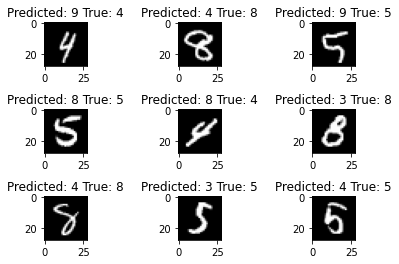

In [103]:
for i,j in enumerate(incorrect_output[100:109]):
  plt.subplot(3,3,i+1)
  plt.subplots_adjust(wspace=1,hspace=1)
  plt.imshow(X_test[j].reshape(28,28),cmap='gray')
  plt.title('Predicted: ' +str(predicted_output[j])+' True: '+str(test_label[j]))

plt.show()

# Take-Home 

Tweak the number of layers or neurons inside each layer to get 90% accuracy for 20 epochs?